# Evaluation comparison of the LLM models

In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
from utils.evaluation import (
    get_all_test_data,
    get_table_column_names,
    get_evaluation_data
)

Configuration loaded in: 0.0 seconds
Debugging is enabled: True
Device: mps is available
VectorStoreIndex: wiki_movie_plots
----------------------------------------------------------------------------------------------------


In [2]:
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
sns.set_palette("pastel")

In [4]:
colors = ['#84c9b2', '#6edea9', '#b6e8ce']

### Set all the parameters

In [5]:
llms = ["oll_gemma_instruct", "oll_llama3_instruct", "oll_mistral_instruct"]
collections = {
    "wiki_movie_plots_512_50_mxbai": "Wiki Movie Plots 512 50",
    "wiki_movie_plots_1024_100_mxbai": "Wiki Movie Plots 1024 100",
    "wiki_movie_plots_2048_200_mxbai": "Wiki Movie Plots 2048 200"
}
collections_keys = [*collections.keys()]
collections_values = [*collections.values()]

metrics = {
    "context_relevancy_score": "Context Relevancy Score",
    "correctness_score": "Correctness Score",
    "faithfulness_score": "Faithfulness Score",
    "relevancy_score": "Relevancy Score",
    "model_score": "Model Score"
}
metrics_keys = [*metrics.keys()]
metrics_values = [*metrics.values()]
labels_llms = {
    "oll_gemma_instruct": "Gemma Instruct",
    "oll_llama3_instruct": "Llama3 Instruct",
    "oll_mistral_instruct": "Mistral Instruct"
}
labels_llms_keys = [*labels_llms.keys()]
labels_llms_values = [*labels_llms.values()]
chat_mode = "CONTEXT"

In [6]:
column_names = get_table_column_names(table_name="evaluation")
column_names

['id',
 'llm_model',
 'embed_model',
 'collection_name',
 'question_id',
 'question',
 'context',
 'reference_answer',
 'response',
 'answer_feedback',
 'context_relevancy_score',
 'context_relevancy_feedback',
 'correctness_score',
 'correctness_feedback',
 'faithfulness_score',
 'relevancy_score',
 'relevancy_feedback',
 'model_score',
 'model_feedback',
 'chat_mode']

### Define the functions

In [7]:
def compare_llms(collection_names=None):
    if collection_names is None:
        collection_names = ["wiki_movie_plots_1024_100_mxbai"]
    data_for_llms = dict()

    for collection_name in collection_names:
        data_for_llms[collection_name] = dict()
        for llm in llms:
            data = get_all_test_data(llm=True, llm_model=llm, collection_name=collection_name, chat_mode=chat_mode)
            data_for_llms[collection_name][llm] = pd.DataFrame(data=data, columns=column_names)
    return data_for_llms

In [8]:
def get_key_index(d, key):
    keys_list = list(d.keys())
    if key in keys_list:
        return keys_list.index(key)
    else:
        return -1

In [9]:
def get_new_labels(labels=None):
    if labels is None:
        return False
    generate_new_labels = list()
    for collection in collections:
        for llm_model in labels_llms:
            collection_name = collections[collection].split(" ")[-2:]
            generate_new_labels.append(f"{labels_llms[llm_model]} - Chunksize: {collection_name[0]}/{collection_name[1]}")
    return generate_new_labels

In [10]:
def create_grid_plots(dataframe, metric_name, **kwargs):
    def create_barplot_for_grid(data, **kwargs):
        sns.barplot(data=data, x='llm_model', y='count', hue=metric_name, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],**kwargs)
        
    # create a grid to pack in multiple barcharts in it
    grid_plots = sns.FacetGrid(dataframe, col="collection_name", height=5, aspect=1)

    # plot the barplot in the grid.
    grid_plots.map_dataframe(create_barplot_for_grid)

    # add labels to the grid
    grid_plots.set_axis_labels("LLM Models", f"Number of Occurrences for {metric_name}")
    #grid_b.set_titles(col_template="{collection_name}", fontsize=16, fontweight='bold', pad=24)
    
    # Improve x-axis labels
    for ax in grid_plots.axes.flat:
        ax.set_xticklabels([*labels_llms.values()])

    grid_plots.add_legend(title=metric_name)
    plt.show()

### Get the data for the LLM models

In [11]:
data_for_llms = compare_llms(collections)

In [12]:
evaluation_data_context = get_evaluation_data()

In [13]:
evaluation_df_context = pd.DataFrame(data=evaluation_data_context, columns=column_names)
evaluation_df_context

,id,llm_model,embed_model,collection_name,question_id,question,context,reference_answer,response,answer_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,faithfulness_score,relevancy_score,relevancy_feedback,model_score,model_feedback,chat_mode
0,1072,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,0,"Who is the director of the movie ""The Karate K...",release_year: 1984\ntitle: The Karate Kid\nori...,"The director of the movie ""The Karate Kid"" rel...","According to the context information provided,...",1. Does the provided response match the subjec...,1.000,1. The retrieved context matches the subject m...,5.0,The generated answer is both relevant and corr...,1.0,1.0,YES,1.0,Assistant A provided a more comprehensive resp...,CONTEXT
1,1073,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,1,"What is the plot of ""The Karate Kid"" released ...",release_year: 1984\ntitle: The Karate Kid\nori...,"The plot of ""The Karate Kid"" released in 1984 ...","Here's the plot of ""The Karate Kid"" (1984):\n\...",1. Does the provided response match the subjec...,1.000,1. The retrieved context matches the subject m...,4.0,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provides a detailed and comprehens...,CONTEXT
2,1074,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,2,"What is the genre of the movie ""The Karate Kid...",release_year: 1984\ntitle: The Karate Kid\nori...,"The genre of the movie ""The Karate Kid"" releas...","The genre of the movie ""The Karate Kid"" releas...",1. The response provided matches the subject m...,1.000,1. The retrieved context matches the subject m...,4.0,"The generated answer is relevant and correct, ...",1.0,1.0,YES,1.0,Assistant A provided a more detailed and compr...,CONTEXT
3,1075,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,3,Who was the legendary boxing trainer that took...,release_year: 2016\ntitle: Hands of Stone\nori...,"Ray Arcel, an American legendary boxing traine...","According to the context information, the lege...",1. The response correctly identifies Ray Arcel...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,0.5,,CONTEXT
4,1076,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,4,What was the result of the rematch between Rob...,release_year: 2016\ntitle: Hands of Stone\nori...,"Durán famously gave up by saying ""No más"" to t...","According to the context information, in the r...",1. The response provided matches the subject m...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,1.0,Assistant A provided a more detailed and accur...,CONTEXT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,3902,oll_mistral_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,310,What is the main plot of Leviathan?,release_year: 1989\ntitle: Leviathan\norigin_e...,The main plot of Leviathan revolves around a c...,"The main plot of the film ""Leviathan,"" releas...",1. The response does not match the subject mat...,1.000,1. The retrieved context matches the subject m...,3.0,The generated answer provides a detailed summa...,1.0,0.0,NO,1.0,Assistant A provides a detailed and comprehens...,CONTEXT
2831,3903,oll_mistral_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,311,How does the film Leviathan end?,release_year: 1989\ntitle: Leviathan\norigin_e...,The film Leviathan ends with the survivors esc...,"In the film ""Leviathan,"" released in 1989, th...",1. The response provided does not match the su...,1.000,1. The retrieved context matches the subject m...,2.5,The generated answer provides a detailed summa...,1.0,0.0,NO,0.5,,CONTEXT
2832,3904,oll_mistral_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,312,"Who are the main characters in the movie ""The ...",release_year: 2002\ntitle: The Tuxedo\norigin_...,The main

## Data for collection A: wiki_movie_plots_512_50_mxbai

In [14]:
collection_512_50 = evaluation_df_context.loc[evaluation_df_context['collection_name'] == [*collections.keys()][0]]
collection_512_50

,id,llm_model,embed_model,collection_name,question_id,question,context,reference_answer,response,answer_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,faithfulness_score,relevancy_score,relevancy_feedback,model_score,model_feedback,chat_mode
945,2017,oll_llama3_instruct,mxbai,wiki_movie_plots_512_50_mxbai,0,"Who is the director of the movie ""The Karate K...",release_year: 1984\ntitle: The Karate Kid\nori...,"The director of the movie ""The Karate Kid"" rel...","According to the context information provided,...","1. Yes, the response matches the subject matte...",1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is relevant and fully cor...,1.0,1.0,YES,1.0,Assistant A and Assistant B both correctly ide...,CONTEXT
946,2018,oll_llama3_instruct,mxbai,wiki_movie_plots_512_50_mxbai,1,"What is the plot of ""The Karate Kid"" released ...",release_year: 1984\ntitle: The Karate Kid\nori...,"The plot of ""The Karate Kid"" released in 1984 ...","According to the context information provided,...",1. Does the provided response match the subjec...,1.000,1. The retrieved context matches the subject m...,3.5,The generated answer provides a detailed summa...,1.0,1.0,YES,1.0,Assistant A provided a detailed and comprehens...,CONTEXT
947,2019,oll_llama3_instruct,mxbai,wiki_movie_plots_512_50_mxbai,2,"What is the genre of the movie ""The Karate Kid...",release_year: 1984\ntitle: The Karate Kid\nori...,"The genre of the movie ""The Karate Kid"" releas...","According to the context information provided,...",1. Does the provided response match the subjec...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is relevant and fully cor...,0.0,1.0,YES,0.0,Assistant B provided a slightly better respons...,CONTEXT
948,2020,oll_llama3_instruct,mxbai,wiki_movie_plots_512_50_mxbai,3,Who was the legendary boxing trainer that took...,release_year: 2016\ntitle: Hands of Stone\nori...,"Ray Arcel, an American legendary boxing traine...","According to the context information provided,...",1. The response correctly identifies Ray Arcel...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,1.0,Assistant A provided a direct and accurate res...,CONTEXT
949,2021,oll_llama3_instruct,mxbai,wiki_movie_plots_512_50_mxbai,4,What was the result of the rematch between Rob...,release_year: 2016\ntitle: Hands of Stone\nori...,"Durán famously gave up by saying ""No más"" to t...","According to the context information provided,...",1. The response matches the subject matter of ...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provided a more detailed and compr...,CONTEXT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,2957,oll_mistral_instruct,mxbai,wiki_movie_plots_512_50_mxbai,310,What is the main plot of Leviathan?,release_year: 1989\ntitle: Leviathan\norigin_e...,The main plot of Leviathan revolves around a c...,"The main plot of ""Leviathan"" revolves around ...",1. The provided response does not match the su...,1.000,1. The retrieved context matches the subject m...,3.0,The generated answer is relevant to the user q...,1.0,0.0,NO,0.5,,CONTEXT
1886,2958,oll_mistral_instruct,mxbai,wiki_movie_plots_512_50_mxbai,311,How does the film Leviathan end?,release_year: 1989\ntitle: Leviathan\norigin_e...,The film Leviathan ends with the survivors esc...,"In the movie ""Leviathan,"" the crew manages to...",1. The response provided does not match the su...,1.000,1. The retrieved context matches the subject m...,3.0,The generated answer provides a detailed summa...,1.0,0.0,NO,0.5,,CONTEXT
1887,2959,oll_mistral_instruct,mxbai,wiki_movie_plots_512_50_mxbai,312,"Who are the main characters in the movie ""The ...",release_year: 2002\ntitle: The Tuxedo\norigin_...,The main character

## Data for collection B: wiki_movie_plots_1024_100_mxbai

In [15]:
collection_1024_100 = evaluation_df_context.loc[evaluation_df_context['collection_name'] == [*collections.keys()][1]]
collection_1024_100

,id,llm_model,embed_model,collection_name,question_id,question,context,reference_answer,response,answer_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,faithfulness_score,relevancy_score,relevancy_feedback,model_score,model_feedback,chat_mode
0,1072,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,0,"Who is the director of the movie ""The Karate K...",release_year: 1984\ntitle: The Karate Kid\nori...,"The director of the movie ""The Karate Kid"" rel...","According to the context information provided,...",1. Does the provided response match the subjec...,1.0,1. The retrieved context matches the subject m...,5.0,The generated answer is both relevant and corr...,1.0,1.0,YES,1.0,Assistant A provided a more comprehensive resp...,CONTEXT
1,1073,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,1,"What is the plot of ""The Karate Kid"" released ...",release_year: 1984\ntitle: The Karate Kid\nori...,"The plot of ""The Karate Kid"" released in 1984 ...","Here's the plot of ""The Karate Kid"" (1984):\n\...",1. Does the provided response match the subjec...,1.0,1. The retrieved context matches the subject m...,4.0,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provides a detailed and comprehens...,CONTEXT
2,1074,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,2,"What is the genre of the movie ""The Karate Kid...",release_year: 1984\ntitle: The Karate Kid\nori...,"The genre of the movie ""The Karate Kid"" releas...","The genre of the movie ""The Karate Kid"" releas...",1. The response provided matches the subject m...,1.0,1. The retrieved context matches the subject m...,4.0,"The generated answer is relevant and correct, ...",1.0,1.0,YES,1.0,Assistant A provided a more detailed and compr...,CONTEXT
3,1075,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,3,Who was the legendary boxing trainer that took...,release_year: 2016\ntitle: Hands of Stone\nori...,"Ray Arcel, an American legendary boxing traine...","According to the context information, the lege...",1. The response correctly identifies Ray Arcel...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,0.5,,CONTEXT
4,1076,oll_llama3_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,4,What was the result of the rematch between Rob...,release_year: 2016\ntitle: Hands of Stone\nori...,"Durán famously gave up by saying ""No más"" to t...","According to the context information, in the r...",1. The response provided matches the subject m...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,1.0,Assistant A provided a more detailed and accur...,CONTEXT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2012,oll_mistral_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,310,What is the main plot of Leviathan?,release_year: 1989\ntitle: Leviathan\norigin_e...,The main plot of Leviathan revolves around a c...,"The main plot of the film ""Leviathan"" (1989) ...",1. Does the provided response match the subjec...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provided a detailed and accurate s...,CONTEXT
941,2013,oll_mistral_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,311,How does the film Leviathan end?,release_year: 1989\ntitle: Leviathan\norigin_e...,The film Leviathan ends with the survivors esc...,"In the film ""Leviathan"" (1989), the mutated c...",1. The response provided matches the subject m...,1.0,1. The retrieved context matches the subject m...,4.5,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provided a detailed and accurate s...,CONTEXT
942,2014,oll_mistral_instruct,mxbai,wiki_movie_plots_1024_100_mxbai,312,"Who are the main characters in the movie ""The ...",release_year: 2002\ntitl

## Data for collection C: wiki_movie_plots_2048_200_mxbai

In [16]:
collection_2048_200 = evaluation_df_context.loc[evaluation_df_context['collection_name'] == [*collections.keys()][2]]
collection_2048_200

,id,llm_model,embed_model,collection_name,question_id,question,context,reference_answer,response,answer_feedback,context_relevancy_score,context_relevancy_feedback,correctness_score,correctness_feedback,faithfulness_score,relevancy_score,relevancy_feedback,model_score,model_feedback,chat_mode
1890,2962,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,0,"Who is the director of the movie ""The Karate K...",release_year: 1984\ntitle: The Karate Kid\nori...,"The director of the movie ""The Karate Kid"" rel...","According to the context information provided,...","1. Yes, the response directly addresses the qu...",1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,1.0,Assistant A provided a more comprehensive resp...,CONTEXT
1891,2963,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,1,"What is the plot of ""The Karate Kid"" released ...",release_year: 1984\ntitle: The Karate Kid\nori...,"The plot of ""The Karate Kid"" released in 1984 ...","According to the context information provided,...",1. Does the provided response match the subjec...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer provides a detailed and a...,1.0,1.0,YES,1.0,Assistant A provides a detailed and comprehens...,CONTEXT
1892,2964,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,2,"What is the genre of the movie ""The Karate Kid...",release_year: 1984\ntitle: The Karate Kid\nori...,"The genre of the movie ""The Karate Kid"" releas...","According to the context information provided,...",1. Does the provided response match the subjec...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is relevant to the user q...,0.0,1.0,YES,0.0,Assistant B provided a more comprehensive and ...,CONTEXT
1893,2965,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,3,Who was the legendary boxing trainer that took...,release_year: 2016\ntitle: Hands of Stone\nori...,"Ray Arcel, an American legendary boxing traine...","According to the context information provided,...",1. The response correctly identifies Ray Arcel...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,0.0,Assistant A correctly identifies the legendary...,CONTEXT
1894,2966,oll_llama3_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,4,What was the result of the rematch between Rob...,release_year: 2016\ntitle: Hands of Stone\nori...,"Durán famously gave up by saying ""No más"" to t...","According to the context information provided,...",1. The provided response matches the subject m...,1.000,1. The retrieved context matches the subject m...,4.5,The generated answer is highly relevant to the...,1.0,1.0,YES,0.0,None,CONTEXT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830,3902,oll_mistral_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,310,What is the main plot of Leviathan?,release_year: 1989\ntitle: Leviathan\norigin_e...,The main plot of Leviathan revolves around a c...,"The main plot of the film ""Leviathan,"" releas...",1. The response does not match the subject mat...,1.000,1. The retrieved context matches the subject m...,3.0,The generated answer provides a detailed summa...,1.0,0.0,NO,1.0,Assistant A provides a detailed and comprehens...,CONTEXT
2831,3903,oll_mistral_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,311,How does the film Leviathan end?,release_year: 1989\ntitle: Leviathan\norigin_e...,The film Leviathan ends with the survivors esc...,"In the film ""Leviathan,"" released in 1989, th...",1. The response provided does not match the su...,1.000,1. The retrieved context matches the subject m...,2.5,The generated answer provides a detailed summa...,1.0,0.0,NO,0.5,,CONTEXT
2832,3904,oll_mistral_instruct,mxbai,wiki_movie_plots_2048_200_mxbai,312,"Who are the main characters in the movie ""The ...",release_year: 2002\ntitle: The Tuxedo\norig

# Comparison of the LLM models

### Correctness Score - Model Comparison

In [17]:
metric_a = [*metrics.keys()][0]
metric_a

'context_relevancy_score'

In [18]:
metric_a_count_values = evaluation_df_context.groupby(['llm_model', 'collection_name', metric_a], observed=True).size().reset_index(name='count')
metric_a_count_values.sort_values(by=['collection_name', metric_a], ascending=True, inplace=True)
metric_a_count_values

,llm_model,collection_name,context_relevancy_score,count
40,oll_mistral_instruct,wiki_movie_plots_1024_100_mxbai,0.000,1
41,oll_mistral_instruct,wiki_movie_plots_1024_100_mxbai,0.125,1
0,oll_gemma_instruct,wiki_movie_plots_1024_100_mxbai,0.250,5
20,oll_llama3_instruct,wiki_movie_plots_1024_100_mxbai,0.250,2
42,oll_mistral_instruct,wiki_movie_plots_1024_100_mxbai,0.250,1
...,...,...,...,...
38,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,0.875,7
59,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,0.875,6
19,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,1.000,295
39,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,1.000,293


[Text(0, 0, 'oll_mistral_instruct'), Text(1, 0, 'oll_gemma_instruct'), Text(2, 0, 'oll_llama3_instruct')]
['Mistral Instruct', 'Gemma Instruct', 'Llama3 Instruct']
[Text(0, 0, 'Mistral Instruct'), Text(1, 0, 'Gemma Instruct'), Text(2, 0, 'Llama3 Instruct')]
[]
[Text(0, 0, ''), Text(1, 0, ''), Text(2, 0, '')]
[]


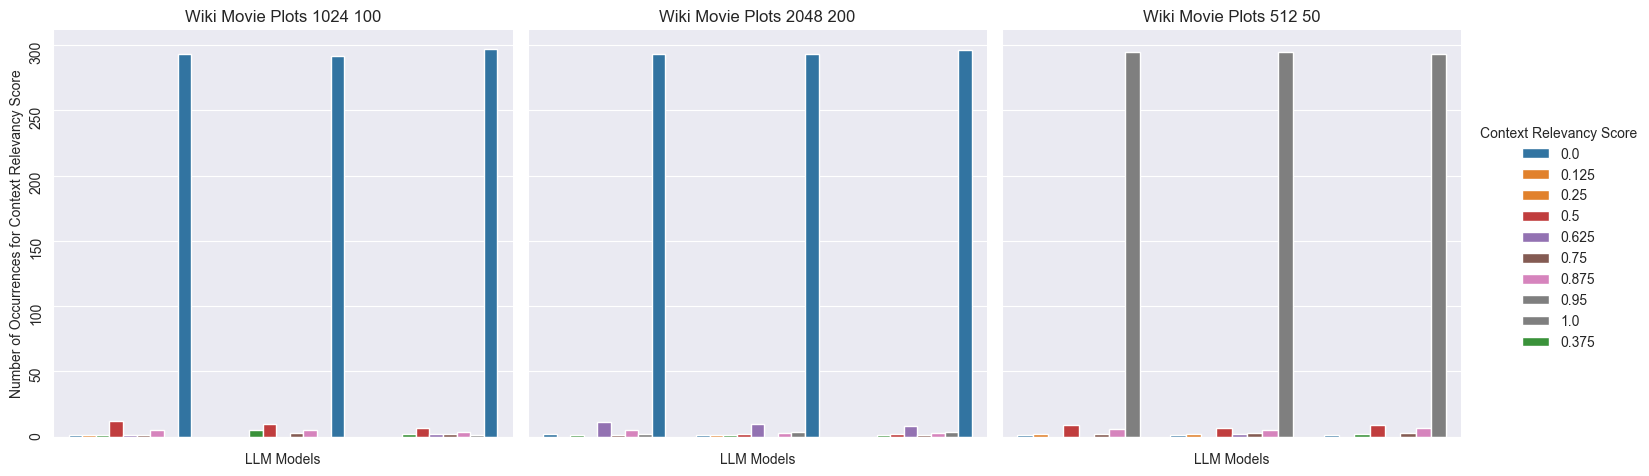

In [110]:
# create a grid to pack in multiple barcharts in it
grid_a = sns.FacetGrid(metric_a_count_values, col="collection_name", height=5, aspect=1)

def create_barplot_for_grid(data, **kwargs):
    sns.barplot(data=data, x='llm_model', y='count', hue=metric_a, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],**kwargs)

# plot the barplot in the grid.
grid_a.map_dataframe(create_barplot_for_grid)

# add labels to the grid
grid_a.set_axis_labels("LLM Models", f"Number of Occurrences for {metrics[metric_a]}")
#grid_a.set_titles(col_template="{collection_name}", fontsize=16, fontweight='bold', pad=24)

# Improve x-axis labels
list_of_collection = metric_a_count_values['collection_name'].unique()
index = 0
for ax in grid_a.axes.flat:
    ax.set_title(collections[list_of_collection[index]])
    labels = ax.get_xticklabels()
    print(labels)
    new_labels = []
    for label in labels:
        if label.get_text() in labels_llms:
            new_labels.append(labels_llms[label.get_text()])
    print(new_labels)
    ax.set_xticklabels(new_labels)
    ax.tick_params(axis='y', which='major', labelrotation=90)
    index += 1

grid_a.add_legend(title=metrics[metric_a])
plt.show()

### Correctness-Score - Model Comparison

In [141]:
metric_b = [*metrics.keys()][1]
metric_b

'correctness_score'

In [142]:
metric_b_count_values = evaluation_df_context.groupby(['llm_model', 'collection_name', metric_b]).size().reset_index(name='count')
metric_b_count_values.sort_values(by=['collection_name', metric_b], ascending=False, inplace=True)
metric_b_count_values

,llm_model,collection_name,correctness_score,count
22,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,5.0,3
46,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,5.0,6
70,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,5.0,8
21,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,4.5,56
45,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,4.5,81
...,...,...,...,...
24,oll_llama3_instruct,wiki_movie_plots_1024_100_mxbai,2.0,35
48,oll_mistral_instruct,wiki_movie_plots_1024_100_mxbai,2.0,23
0,oll_gemma_instruct,wiki_movie_plots_1024_100_mxbai,1.0,1
23,oll_llama3_instruct,wiki_movie_plots_1024_100_mxbai,1.0,4


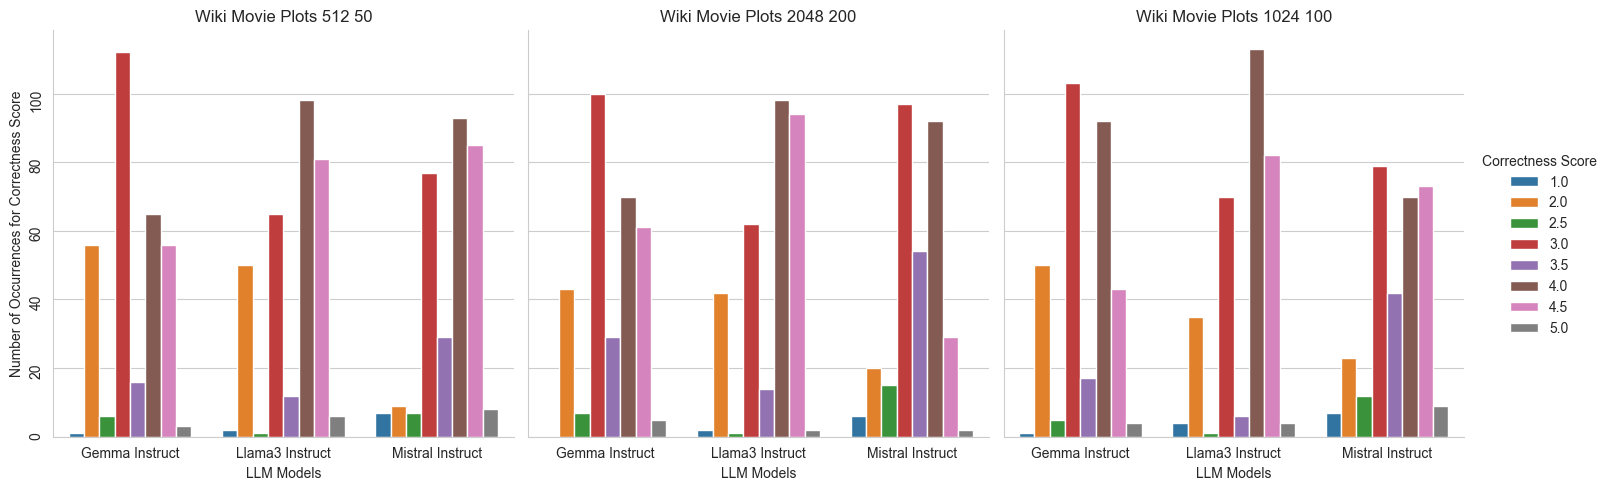

In [143]:
# create a grid to pack in multiple barcharts in it
grid_b = sns.FacetGrid(metric_b_count_values, col="collection_name", height=5, aspect=1)

def create_barplot_for_grid(data, **kwargs):
    sns.barplot(data=data, x='llm_model', y='count', hue=metric_b, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],**kwargs)

# plot the barplot in the grid.
grid_b.map_dataframe(create_barplot_for_grid)

# add labels to the grid
grid_b.set_axis_labels("LLM Models", f"Number of Occurrences for {metrics[metric_b]}")
#grid_b.set_titles(col_template="{collection_name}", fontsize=16, fontweight='bold', pad=24)

list_of_collection = metric_b_count_values['collection_name'].unique()
index = 0
for ax in grid_b.axes.flat:
    ax.set_title(collections[list_of_collection[index]])
    labels = ax.get_xticklabels()
    ax.set_xticklabels([*labels_llms.values()])
    ax.tick_params(axis='y', which='major', labelrotation=90)
    index += 1

grid_b.add_legend(title=metrics[metric_b])
plt.show()

### Faithful Score - Model Comparison

In [144]:
metric_c = [*metrics.keys()][2]
metric_c

'faithfulness_score'

In [145]:
metric_c_count_values = evaluation_df_context.groupby(['llm_model', 'collection_name', metric_c]).size().reset_index(name='count')
metric_c_count_values.sort_values(by=['collection_name', metric_c], ascending=False, inplace=True)
metric_c_count_values

,llm_model,collection_name,faithfulness_score,count
5,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,1.0,284
11,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,1.0,247
17,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,1.0,306
4,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,0.0,31
10,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,0.0,68
16,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,0.0,9
3,oll_gemma_instruct,wiki_movie_plots_2048_200_mxbai,1.0,275
9,oll_llama3_instruct,wiki_movie_plots_2048_200_mxbai,1.0,250
15,oll_mistral_instruct,wiki_movie_plots_2048_200_mxbai,1.0,304
2,oll_gemma_instruct,wiki_movie_plots_2048_200_mxbai,0.0,40


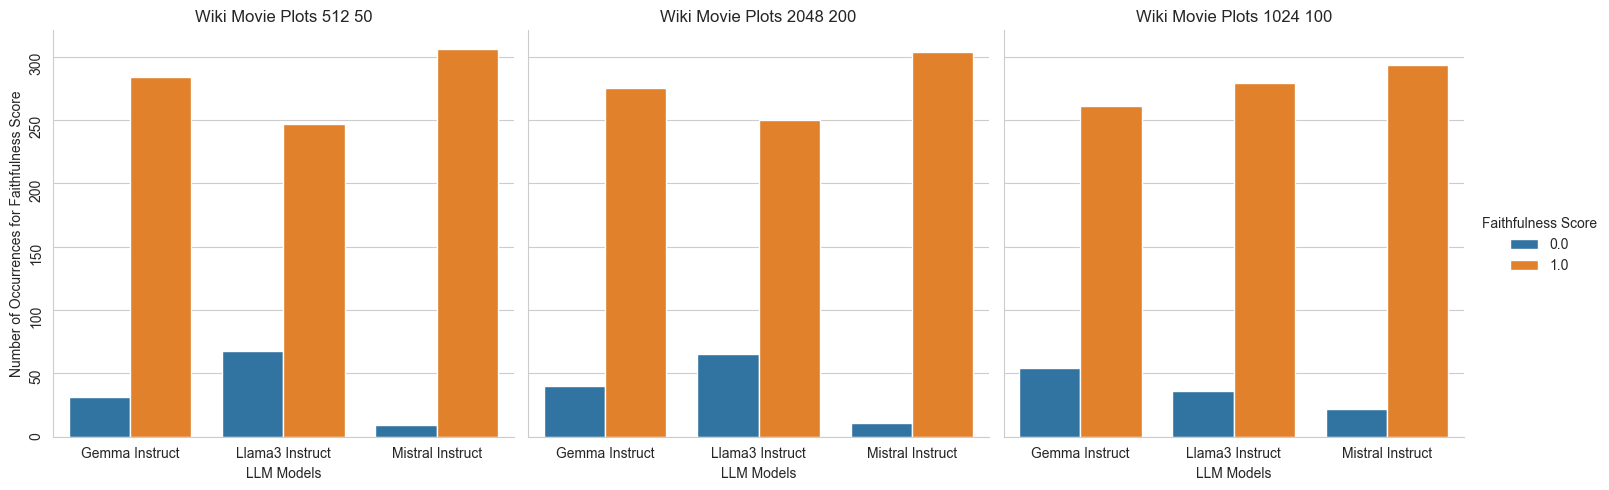

In [159]:
# create a grid to pack in multiple barcharts in it
grid_c = sns.FacetGrid(metric_c_count_values, col="collection_name", height=5, aspect=1)

def create_barplot_for_grid(data, **kwargs):
    sns.barplot(data=data, x='llm_model', y='count', hue=metric_c, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],**kwargs)

# plot the barplot in the grid.
grid_c.map_dataframe(create_barplot_for_grid)

# add labels to the grid
grid_c.set_axis_labels("LLM Models", f"Number of Occurrences for {metrics[metric_c]}")
#grid_c.set_titles(col_template="{collection_name}", fontsize=16, fontweight='bold', pad=24)

list_of_collection = metric_c_count_values['collection_name'].unique()
index = 0
for ax in grid_c.axes.flat:
    ax.set_title(collections[list_of_collection[index]])
    labels = ax.get_xticklabels()
    ax.set_xticklabels([*labels_llms.values()])
    ax.tick_params(axis='y', which='major', labelrotation=90)
    index += 1

grid_c.add_legend(title=metrics[metric_c])
plt.show()

### Relevancy Score - Model Comparison

In [148]:
metric_d = [*metrics.keys()][3]
metric_d

'relevancy_score'

In [149]:
metric_d_count_values = evaluation_df_context.groupby(['llm_model', 'collection_name', metric_d]).size().reset_index(name='count')
metric_d_count_values.sort_values(by=['collection_name', metric_d], ascending=False, inplace=True)
metric_d_count_values

,llm_model,collection_name,relevancy_score,count
5,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,1.0,203
11,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,1.0,187
17,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,1.0,224
4,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,0.0,112
10,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,0.0,128
16,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,0.0,91
3,oll_gemma_instruct,wiki_movie_plots_2048_200_mxbai,1.0,213
9,oll_llama3_instruct,wiki_movie_plots_2048_200_mxbai,1.0,191
15,oll_mistral_instruct,wiki_movie_plots_2048_200_mxbai,1.0,189
2,oll_gemma_instruct,wiki_movie_plots_2048_200_mxbai,0.0,102


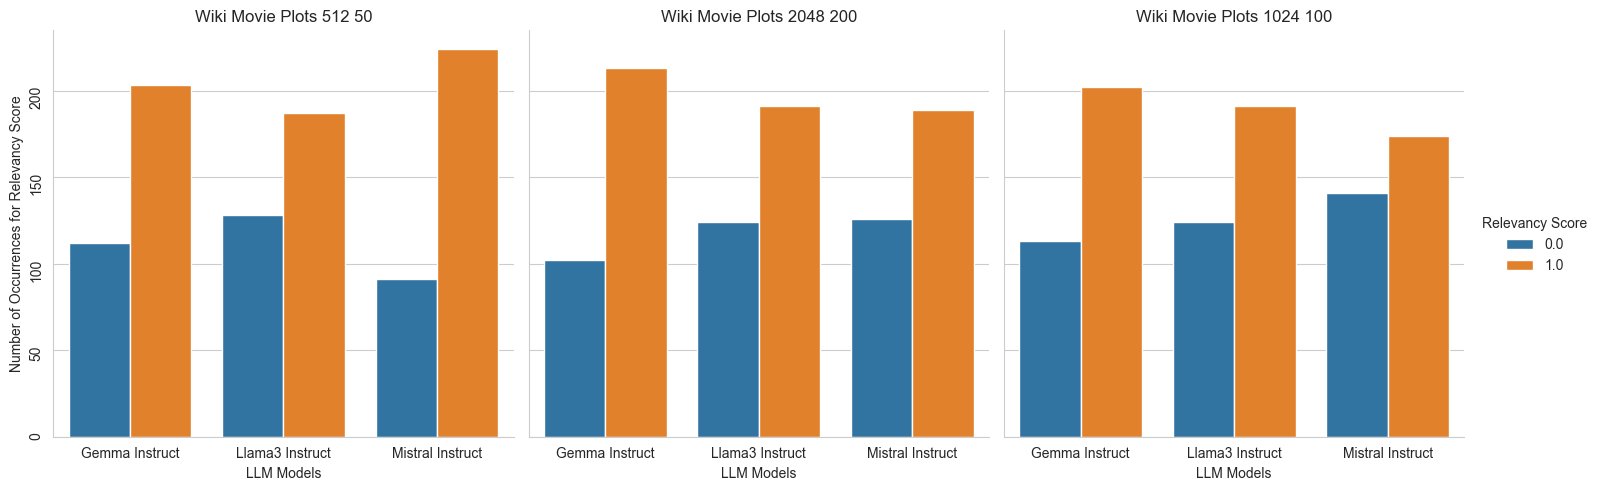

In [151]:
# create a grid to pack in multiple barcharts in it
grid_d = sns.FacetGrid(metric_d_count_values, col="collection_name", height=5, aspect=1)

def create_barplot_for_grid(data, **kwargs):
    sns.barplot(data=data, x='llm_model', y='count', hue=metric_d, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],**kwargs)

# plot the barplot in the grid.
grid_d.map_dataframe(create_barplot_for_grid)

# add labels to the grid
grid_d.set_axis_labels("LLM Models", f"Number of Occurrences for {metrics[metric_d]}")
#grid_d.set_titles(col_template="{collection_name}", fontsize=16, fontweight='bold', pad=24)

list_of_collection = metric_d_count_values['collection_name'].unique()
index = 0
for ax in grid_d.axes.flat:
    ax.set_title(collections[list_of_collection[index]])
    labels = ax.get_xticklabels()
    ax.set_xticklabels([*labels_llms.values()])
    ax.tick_params(axis='y', which='major', labelrotation=90)
    index += 1

grid_d.add_legend(title=metrics[metric_d])
plt.show()

## Model Score - Model Comparison

In [153]:
metric_e = [*metrics.keys()][4]
metric_e

'model_score'

In [154]:
metric_e_count_values = evaluation_df_context.groupby(['llm_model', 'collection_name', metric_e]).size().reset_index(name='count')
metric_e_count_values.sort_values(by=['collection_name', metric_e], ascending=False, inplace=True)
metric_e_count_values

,llm_model,collection_name,model_score,count
8,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,1.0,38
17,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,1.0,99
26,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,1.0,188
7,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,0.5,62
16,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,0.5,89
25,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,0.5,72
6,oll_gemma_instruct,wiki_movie_plots_512_50_mxbai,0.0,215
15,oll_llama3_instruct,wiki_movie_plots_512_50_mxbai,0.0,127
24,oll_mistral_instruct,wiki_movie_plots_512_50_mxbai,0.0,55
5,oll_gemma_instruct,wiki_movie_plots_2048_200_mxbai,1.0,25


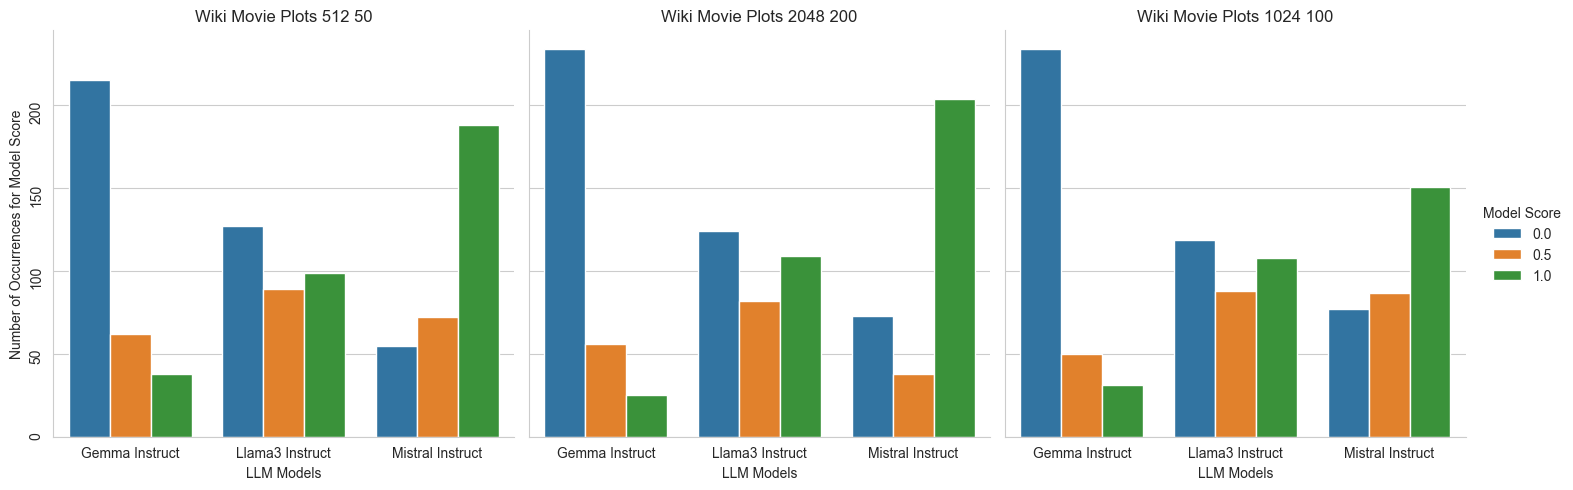

In [158]:
# create a grid to pack in multiple barcharts in it
grid_e = sns.FacetGrid(metric_e_count_values, col="collection_name", height=5, aspect=1)

def create_barplot_for_grid(data, **kwargs):
    sns.barplot(data=data, x='llm_model', y='count', hue=metric_e, palette=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f'],**kwargs)

# plot the barplot in the grid.
grid_e.map_dataframe(create_barplot_for_grid)

# add labels to the grid
grid_e.set_axis_labels("LLM Models", f"Number of Occurrences for {metrics[metric_e]}")
#grid_e.set_titles(col_template="{collection_name}", fontsize=16, fontweight='bold', pad=24)

list_of_collection = metric_e_count_values['collection_name'].unique()
index = 0
for ax in grid_e.axes.flat:
    ax.set_title(collections[list_of_collection[index]])
    labels = ax.get_xticklabels()
    ax.set_xticklabels([*labels_llms.values()])
    ax.tick_params(axis='y', which='major', labelrotation=90)
    index += 1

grid_e.add_legend(title=metrics[metric_e])
plt.show()